# __Exploratory Data Analysis__ - `business` Dataset

In [880]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import learning_curve, cross_validate, cross_val_score

pd.set_option('display.max_columns', None)

## Business dataset

In [881]:
# Load data
business_path = '/Users/quentindubois/code/Dimasaur/scorecast/raw_data/yelp_dataset_yelp_academic_dataset_business.json'
business = pd.read_json(business_path,
                    lines=True)

In [882]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Describe data

In [883]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


### __Observations__
- The `attributes` feature has 9,2% missing values
- The hours feature has 15,4% missing values
- Everything else is __fine__.

In [884]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [885]:
business.stars.value_counts()

4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: stars, dtype: int64

### __Observations__
Few numerical columns:
- Latitude and longitude aren't that useful
- The `stars` feature is numerical but it is actually a discrete variable, with values ranging from 1.0 to 5.0, with a step size of 0.5 (i.e. 1.0, 1.5, 2.0, 2.5, and so on). __It will need to be encoded with an ordinal encoder.__
- `review_count` looks like it might have a right skew: average number of reviews is 45 with a standard deviation of 121, 75th percentle is 37.
- `is_open` is a boolean field coming through as an integer.

# Data Visualisation

#### `categories`

In [886]:
# Check most and least common categories
business.categories.value_counts(normalize=True)

Beauty & Spas, Nail Salons                                                                                       0.006736
Restaurants, Pizza                                                                                               0.006223
Nail Salons, Beauty & Spas                                                                                       0.006217
Pizza, Restaurants                                                                                               0.005478
Restaurants, Mexican                                                                                             0.004845
                                                                                                                   ...   
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas           0.000007
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances    0.000007
Food Trucks, Smokehouse,

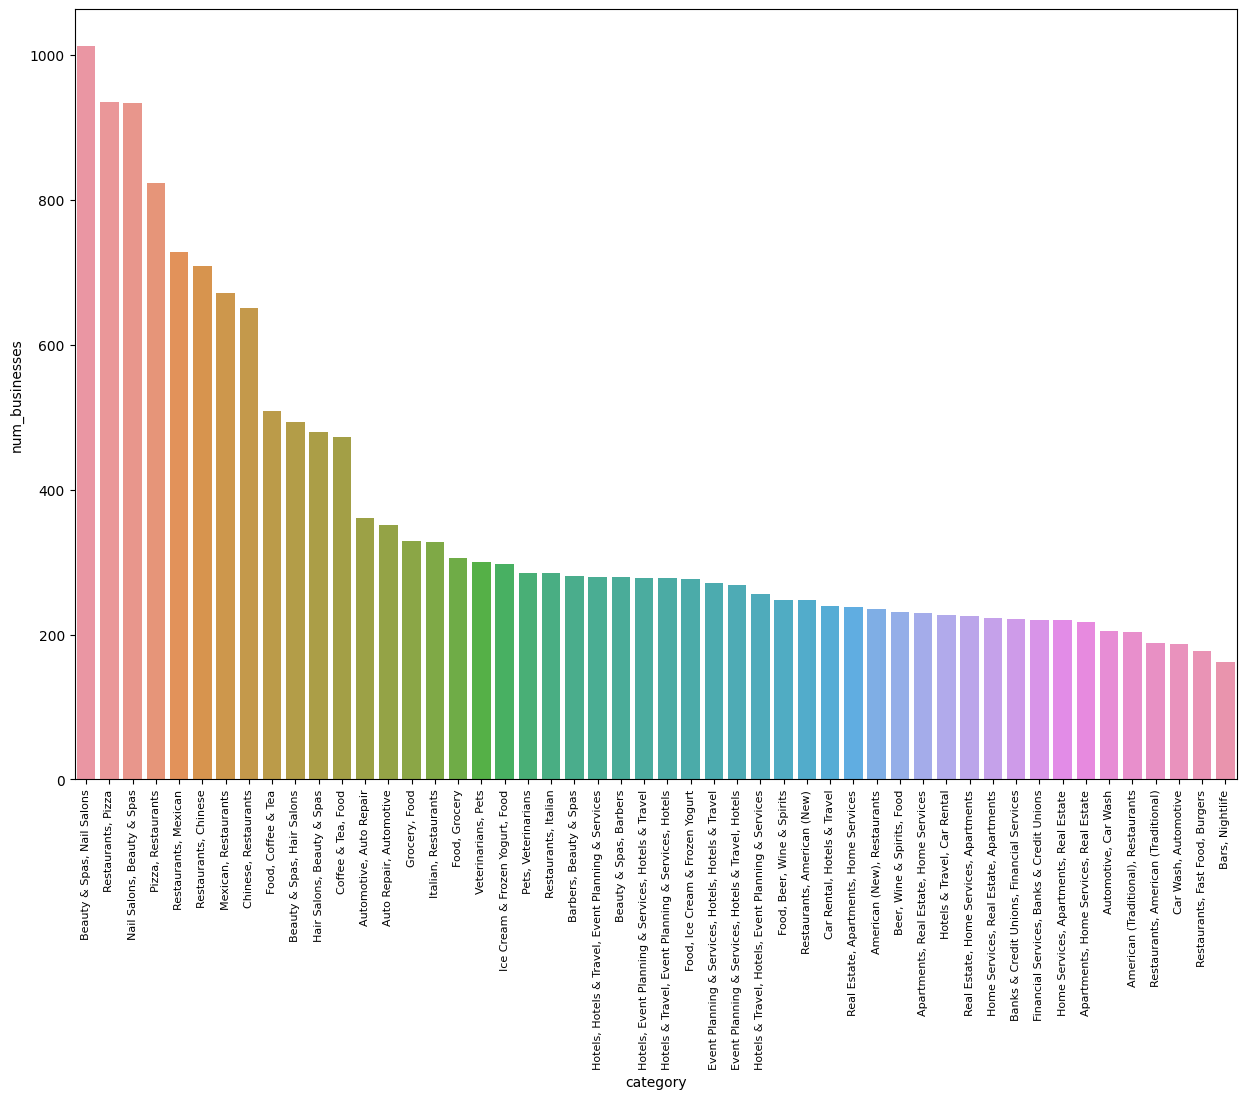

In [887]:
# Plotting the 50 most common categories in terms of number of businesses
plt.figure(figsize=(15,10))

cat_counts = business['categories'].value_counts().reset_index()[:50]
cat_counts.columns = ['category', 'num_businesses']

sns.barplot(data = cat_counts,
            x='category',
            y='num_businesses')

# Rotate x-tick labels due to many categories
plt.xticks(rotation=90, fontsize=8);

In [888]:
business.categories.nunique()

83160

In [889]:
business.categories.isnull().sum()

103

In [890]:
#business['contains_restaurant'] = False
business['contains_restaurants'] = business['categories'].str.contains('Restaurants')

In [891]:
business.contains_restaurants.value_counts(normalize=True)

False    0.65211
True     0.34789
Name: contains_restaurants, dtype: float64

In [892]:
# Create restaurants subset
restaurants = business[business['contains_restaurants'] == True].reset_index()
# Drop contains_restaurants
restaurants = restaurants.drop(columns='contains_restaurants')

In [893]:
restaurants.categories.nunique()

31680

In [894]:
restaurants.categories.value_counts(normalize=True)

Restaurants, Pizza                                                                                                                                                         0.017889
Pizza, Restaurants                                                                                                                                                         0.015746
Restaurants, Mexican                                                                                                                                                       0.013928
Restaurants, Chinese                                                                                                                                                       0.013546
Mexican, Restaurants                                                                                                                                                       0.012857
                                                                                                    

In [895]:
# Extract food type from the categories column

# 1. Split the categories to make a list out of the different elements
restaurants['food_type_raw'] = restaurants['categories'].str.split(', ')

# 2.1 Remove the "Restaurants" element from the list
restaurants['food_type_temp'] = restaurants['food_type_raw'].apply(lambda x: [item for item in x if item != "Restaurants"])
# 2.2 Remove the "Breakfast & Brunch" element from the list
restaurants['food_type_temp'] = restaurants['food_type_temp'].apply(lambda x: [item for item in x if item != "Breakfast & Brunch"])

# 3. Compute length of list with remaining elements
restaurants['food_type_length'] = restaurants['food_type_temp'].apply(len)

# 4. Set `food_type` to Other when there are 3 or more elements as categories, else jsut set the 1 or 2 elements
restaurants['food_type'] = 'O'

# restaurants.loc[restaurants['food_type_length'] == 1 ,'food_type'] = restaurants.loc[restaurants['food_type_length'] == 1, \
#     'food_type_temp'].apply(lambda x: x[0])

restaurants.loc[restaurants['food_type_length'] <= 2 ,'food_type'] = restaurants.loc[restaurants['food_type_length'] <= 2, \
     'food_type_temp']

# 5. Order list elements alphabetically so as to get rid of "inverted duplicates" e.g. [Pizza, Italian] and [Italian, Pizza]
restaurants['food_type'] = restaurants['food_type'].apply(lambda x: sorted(x))

# Remove `food_type_length` column
restaurants.drop(columns=['food_type_raw', 'food_type_temp', 'food_type_length'], inplace=True)

In [896]:
restaurants.categories.str.contains('Breakfast & Brunch').sum()/len(restaurants)

0.11936557740873957

In [897]:
restaurants.sample(5, random_state=1)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type
49164,141558,v70BCKY2DJQ9Ve5C6Ab7tg,Luigi's Pizzaria,716 Sansom St,Philadelphia,PA,19106,39.948449,-75.153238,4.0,7,0,"{'RestaurantsDelivery': 'None', 'RestaurantsTa...","Breakfast & Brunch, Restaurants, Pizza, Italian","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...","[Italian, Pizza]"
20121,58023,hBVsdHTJHDpoWynN1w91EA,Outback Steakhouse,4390 N Illinois St,Swansea,IL,62226,38.567330,-89.984042,3.0,80,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Steakhouses, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",[Steakhouses]
40438,116500,pcRQ_Ctv-g4upVQH2qwytw,La Parada Restaurant,301 Kietzke Ln,Reno,NV,89502,39.526110,-119.789535,4.0,130,1,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Mexican, Breakfast & Brunch, Event Planning & ...","{'Tuesday': '7:0-17:0', 'Wednesday': '7:0-17:0...",[O]
38551,111081,uKnoHpDQTQZiqsOldeMx7Q,Weather Vane Ice Cream,3208 Maryville Rd,Granite City,IL,62040,38.719437,-90.103952,4.0,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Food, American (Traditional), Cof...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-22:0', ...",[O]
6718,19327,rHUYy0Khq-_O8lMoj4MNKw,Westy Grille and Pub,7220 Central Ave,Saint Petersburg,FL,33707,27.770545,-82.738629,3.0,6,0,"{'NoiseLevel': 'u'average'', 'OutdoorSeating':...","Bars, American (New), Pubs, Nightlife, Local F...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",[O]


In [898]:
restaurants.sample(5, random_state=10).iloc[3,13]

'Restaurants, Bars, American (Traditional), Nightlife'

In [899]:
restaurants.food_type.value_counts(normalize=True).round(3).head(10)

[O]                         0.625
[Pizza]                     0.034
[Mexican]                   0.027
[Chinese]                   0.026
[Burgers, Fast Food]        0.016
[Italian, Pizza]            0.013
[Italian]                   0.012
[American (New)]            0.010
[American (Traditional)]    0.010
[Fast Food, Sandwiches]     0.010
Name: food_type, dtype: float64

In [900]:
# # Plotting the 50 most common food types (without 'Other')
# plt.figure(figsize=(15,10))

# cat_counts = restaurants['food_type'].value_counts().reset_index()[:50]
# cat_counts.columns = ['food_type', 'num_businesses']

# sns.barplot(data = cat_counts,
#             x='food_type',
#             y='num_businesses')

# # Rotate x-tick labels due to many categories
# plt.xticks(rotation=90, fontsize=8);

#### __Observations__
- VERY large number of categories: 83k
  - This will have to be reduced by grouping categories
- There are numerous categories that are irrelevant for the project e.g. Beauty & Spas, Nail Salons.
  - This will also have to be cleaned up.


__Further digging__
- About 1/3rd of the data (52k businesses) have the word "Restaurants" as one of their categories
  - ➡️ Suggestion to filter dataset for only businesses that have the word "Restaurants" as one of their categories.

---

#### `attributes`

In [901]:
# Checking out attributes entry for an observation
sorted(restaurants[['attributes']].iloc[1,0].keys())

['Alcohol',
 'Ambience',
 'BikeParking',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'DogsAllowed',
 'DriveThru',
 'GoodForKids',
 'HappyHour',
 'HasTV',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'WheelchairAccessible',
 'WiFi']

In [902]:
# Extracting values from the `attributes` feature
restaurants['delivery'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsDelivery', False) if x else False)
restaurants['alcohol'] = restaurants['attributes'].apply(lambda x: x.get('Alcohol', False) if x else False)
restaurants['ambience'] = restaurants['attributes'].apply(lambda x: x.get('Ambience', False) if x else False)
restaurants['bike_parking'] = restaurants['attributes'].apply(lambda x: x.get('BikeParking', False) if x else False)
restaurants['credit_card'] = restaurants['attributes'].apply(lambda x: x.get('BusinessAcceptsCreditCards', False) if x else False)
restaurants['parking'] = restaurants['attributes'].apply(lambda x: x.get('BusinessParking', False) if x else False)
restaurants['appointment_only'] = restaurants['attributes'].apply(lambda x: x.get('ByAppointmentOnly', False) if x else False)
restaurants['caters'] = restaurants['attributes'].apply(lambda x: x.get('Caters', False) if x else False)
restaurants['coat_check'] = restaurants['attributes'].apply(lambda x: x.get('CoatCheck', False) if x else False)
restaurants['dogs'] = restaurants['attributes'].apply(lambda x: x.get('DogsAllowed', False) if x else False)
restaurants['drive_thru'] = restaurants['attributes'].apply(lambda x: x.get('DriveThru', False) if x else False)
restaurants['good_for_kids'] = restaurants['attributes'].apply(lambda x: x.get('GoodForKids', False) if x else False)
restaurants['good_for_groups'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsGoodForGroups', False) if x else False)
restaurants['happy_hour'] = restaurants['attributes'].apply(lambda x: x.get('HappyHour', False) if x else False)
restaurants['tv'] = restaurants['attributes'].apply(lambda x: x.get('HasTV', False) if x else False)
restaurants['outdoor_seating'] = restaurants['attributes'].apply(lambda x: x.get('OutdoorSeating', False) if x else False)
restaurants['attire'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsAttire', False) if x else False)
restaurants['price_range'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsPriceRange2', False) if x else False)
restaurants['reservations'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsReservations', False) if x else False)
restaurants['table_service'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsTableService', False) if x else False)
restaurants['take_out'] = restaurants['attributes'].apply(lambda x: x.get('RestaurantsTakeOut', False) if x else False)
restaurants['wheelchair'] = restaurants['attributes'].apply(lambda x: x.get('WheelchairAccessible', False) if x else False)
restaurants['wifi'] = restaurants['attributes'].apply(lambda x: x.get('WiFi', False) if x else False)

# Inspect df
restaurants.head(3)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type,delivery,alcohol,ambience,bike_parking,credit_card,parking,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",[O],False,u'none',False,True,False,"{'garage': False, 'street': True, 'validated':...",False,True,False,False,False,False,False,False,False,False,False,1,False,False,True,False,u'free'
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",[O],True,u'none',None,False,True,None,False,False,False,False,True,True,True,False,True,True,u'casual',1,False,False,True,True,u'no'
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,[O],False,u'full_bar',"{'romantic': False, 'intimate': False, 'touris...",False,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,True,False,True,True,u'casual',1,False,False,True,False,u'free'


#### Further processing of `alcohol`

In [ ]:
# Further processing of `alcohol` feature
restaurants['alcohol'][(restaurants['alcohol']== "u'full_bar'") |
                       (restaurants['alcohol']== "u'beer_and_wine'") |
                       (restaurants['alcohol']== "'full_bar'") |
                       (restaurants['alcohol']== "'beer_and_wine'")] = True

restaurants['alcohol'][(restaurants['alcohol']== "u'none'") |
                       (restaurants['alcohol']== "'none'") |
                       (restaurants['alcohol']== "None")] = False

In [904]:
restaurants.alcohol.value_counts(normalize=True).round(3)

False    0.624
True     0.376
Name: alcohol, dtype: float64

#### Further processing of `ambience`

In [919]:
restaurants.loc[2,'ambience']

"{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"

In [920]:
# Function to remove 'u' from keys in a dictionary
# def remove_u_from_keys(d):
#     if isinstance(d, dict):
#         return {key.lstrip('u'): value for key, value in d.items()}
#     return d

def remove_u_from_keys(d):
    if isinstance(d, dict):
        return {str(key).lstrip('u').strip("'"): value for key, value in d.items()}
    return d

# Apply the function to the 'ambience' column
restaurants['ambience'] = restaurants['ambience'].apply(remove_u_from_keys)

In [921]:
restaurants.ambience.value_counts(normalize=True)

False                                                                                                                                                                     0.204733
{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}          0.120973
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}          0.091681
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}           0.079035
{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}           0.078939
                                                                                                         

### Observations
- 
---

### `hours`

In [929]:
restaurants.head(10)

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,food_type,delivery,alcohol,ambience,bike_parking,credit_card,parking,appointment_only,caters,coat_check,dogs,drive_thru,good_for_kids,good_for_groups,happy_hour,tv,outdoor_seating,attire,price_range,reservations,table_service,take_out,wheelchair,wifi
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",[O],False,False,False,True,False,"{'garage': False, 'street': True, 'validated':...",False,True,False,False,False,False,False,False,False,False,False,1,False,False,True,False,u'free'
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",[O],True,False,None,False,True,None,False,False,False,False,True,True,True,False,True,True,u'casual',1,False,False,True,True,u'no'
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,[O],False,True,"{'romantic': False, 'intimate': False, 'touris...",False,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,True,False,True,True,u'casual',1,False,False,True,False,u'free'
3,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",[O],True,False,False,False,True,"{'garage': False, 'street': False, 'validated'...",False,False,False,False,True,True,False,False,True,True,'casual',1,False,False,True,True,u'no'
4,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",[O],False,False,"{'touristy': False, 'hipster': False, 'romanti...",False,False,"{'garage': False, 'street': False, 'validated'...",False,False,False,False,False,False,False,False,False,None,False,False,False,False,False,False,False
5,12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...","[American (Traditional), Diners]",True,False,"{'touristy': None, 'hipster': None, 'romantic'...",False,True,"{'garage': None, 'street': False, 'validated':...",False,False,False,False,False,True,True,False,True,False,'casual',1,False,False,True,False,u'no'
6,14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",[O],True,False,"{'romantic': False, 'intimate': False, 'touris...",True,True,"{'garage': False, 'street': False, 'validated'...",False,True,False,False,False,True,False,False,True,False,u'casual',1,False,False,True,True,u'no'
7,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...","[Japanese, Sushi Bars]",True,True,"{'touristy': False, 'hipster': False, 'romanti...",False,True,"{u'valet': False, u'garage': None, u'street': ...",False,F

In [937]:
example_hours = restaurants[["hours"]].iloc[1,0]

In [946]:
example_hours

{'Monday': '0:0-0:0',
 'Tuesday': '6:0-22:0',
 'Wednesday': '6:0-22:0',
 'Thursday': '6:0-22:0',
 'Friday': '9:0-0:0',
 'Saturday': '9:0-22:0',
 'Sunday': '8:0-22:0'}

In [948]:
16*3+15+13+14

90

In [945]:
example_hours['Monday'].split("-")[0].split(":")

['0', '0']

In [953]:
hours_per_week = 0

for day, hours in example_hours.items():
    print(day, hours)

    hours_split = hours.split("-")

    opening_hours = hours_split[0].split(":")
    closing_hours = hours_split[1].split(":")

    opening_hour = int(opening_hours[0])
    opening_minute = int(opening_hours[1])/60

    closing_hour = int(closing_hours[0])
    closing_minute = int(closing_hours[1])/60

    if opening_hour == 0:
        opening_hour = 24

    if closing_hour == 0:
        closing_hour = 24

    opening_time = opening_hour + opening_minute
    closing_time = closing_hour + closing_minute

    hours_open = closing_time - opening_time

    hours_per_week += hours_open

    print(f'Opening hour: {opening_hour} - Opening minute: {opening_minute}\nClosing hour: {closing_hour} - Closing minute: {closing_minute}\nHours per week: {hours_per_week}\n')

print(closing_hour)

Monday 0:0-0:0
Opening hour: 24 - Opening minute: 0.0
Closing hour: 24 - Closing minute: 0.0
Hours per week: 0.0

Tuesday 6:0-22:0
Opening hour: 6 - Opening minute: 0.0
Closing hour: 22 - Closing minute: 0.0
Hours per week: 16.0

Wednesday 6:0-22:0
Opening hour: 6 - Opening minute: 0.0
Closing hour: 22 - Closing minute: 0.0
Hours per week: 32.0

Thursday 6:0-22:0
Opening hour: 6 - Opening minute: 0.0
Closing hour: 22 - Closing minute: 0.0
Hours per week: 48.0

Friday 9:0-0:0
Opening hour: 9 - Opening minute: 0.0
Closing hour: 24 - Closing minute: 0.0
Hours per week: 63.0

Saturday 9:0-22:0
Opening hour: 9 - Opening minute: 0.0
Closing hour: 22 - Closing minute: 0.0
Hours per week: 76.0

Sunday 8:0-22:0
Opening hour: 8 - Opening minute: 0.0
Closing hour: 22 - Closing minute: 0.0
Hours per week: 90.0

22


In [936]:
restaurants[["hours"]].head(20)

,hours
0,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,None
3,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
5,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
6,"{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
7,"{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
8,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
9,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."


In [934]:
for value in example_hours.values():
    value.strip("'")

In [935]:
example_hours

{'Monday': '0:0-0:0',
 'Tuesday': '6:0-22:0',
 'Wednesday': '6:0-22:0',
 'Thursday': '6:0-22:0',
 'Friday': '9:0-0:0',
 'Saturday': '9:0-22:0',
 'Sunday': '8:0-22:0'}

#### `stars`

Text(0.5, 1.0, 'Stars\nMean:3.6\nStd. Dev:0.97')

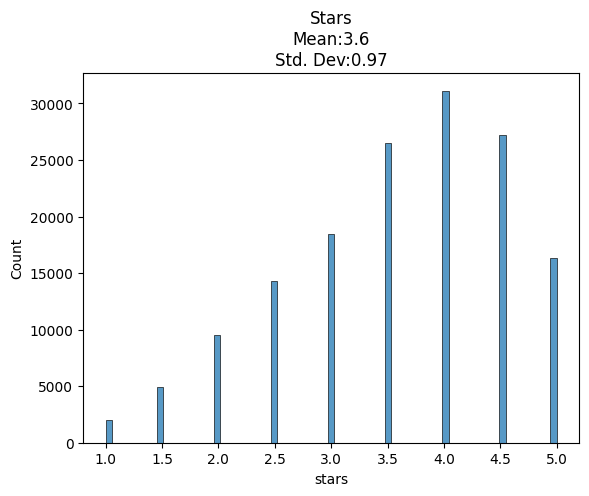

In [148]:
sns.histplot(data = restaurants.stars);
plt.title(f'Stars\nMean:{round(restaurants.stars.mean(),2)}\nStd. Dev:{round(restaurants.stars.std(),2)}')

In [188]:
restaurants.stars.nunique()

9

#### `review_count`

Text(0.5, 1.0, 'Review Count (Zoomed)')

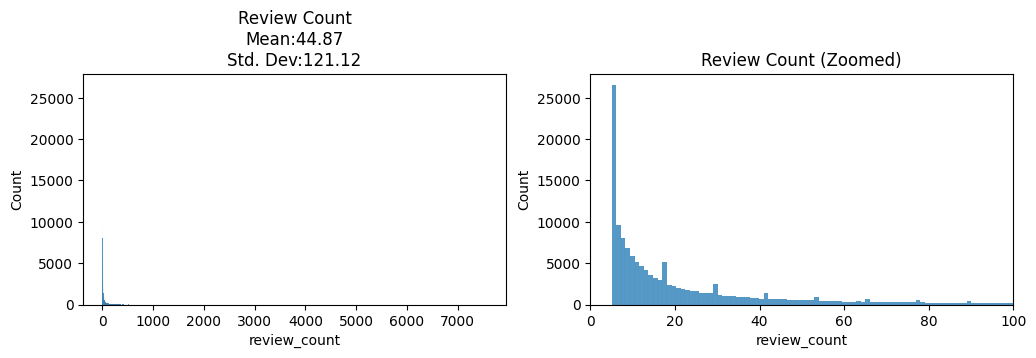

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))

sns.histplot(data = restaurants.review_count, ax = ax[0])
sns.histplot(data = restaurants.review_count, ax = ax[1])
ax[1].set_xlim([0,100])
ax[0].set_title(f'Review Count\nMean:{round(restaurants.review_count.mean(),2)}\nStd. Dev:{round(restaurants.review_count.std(),2)}')
ax[1].set_title(f'Review Count (Zoomed)')

In [189]:
restaurants.review_count.min()

5

#### `is_open`

Text(0.5, 1.0, 'Is open\nMean:0.8\nStd. Dev:0.4')

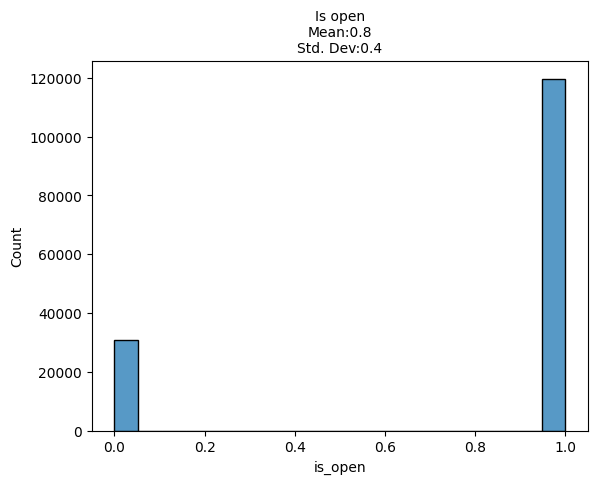

In [151]:
sns.histplot(data = restaurants.is_open);
plt.title(f'Is open\nMean:{round(restaurants.is_open.mean(),2)}\nStd. Dev:{round(restaurants.is_open.std(),2)}',
          fontsize=10)

In [152]:
restaurants.is_open.value_counts(normalize=True)

1    0.79615
0    0.20385
Name: is_open, dtype: float64

### Categorical features: `city`, `state`, `attributes`, `categories`, `hours`
#### `city`

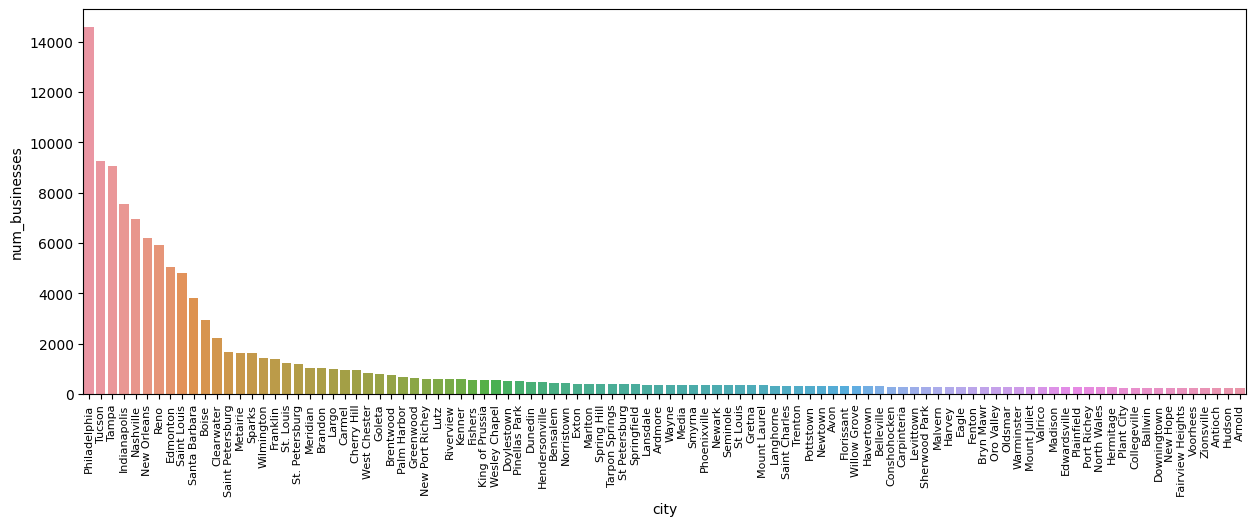

In [153]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
city_counts = restaurants['city'].value_counts().reset_index()[:100]
city_counts.columns = ['city', 'num_businesses']

sns.barplot(data = city_counts,
            x='city',
            y='num_businesses')
# Rotate x-tick labels due to many cities
plt.xticks(rotation=90, fontsize=8);

In [154]:
restaurants.city.value_counts(normalize=True)[:5].sum()

0.3151397443230948

In [155]:
restaurants.city.nunique()

1416

In [156]:
restaurants.city.isnull().sum()

0

In [ ]:
sns.scatterplot(data=restaurants,
                )

### __Observations__
- There are __1416__ unique cities represented in the business dataset.
- Philadelphia accounts for 9,6% of all businesses.
- The top 5 cities (0,3% of all cities in dataset) account for 32% of businesses in the dataset.
- __No missing values.__

#### `state`

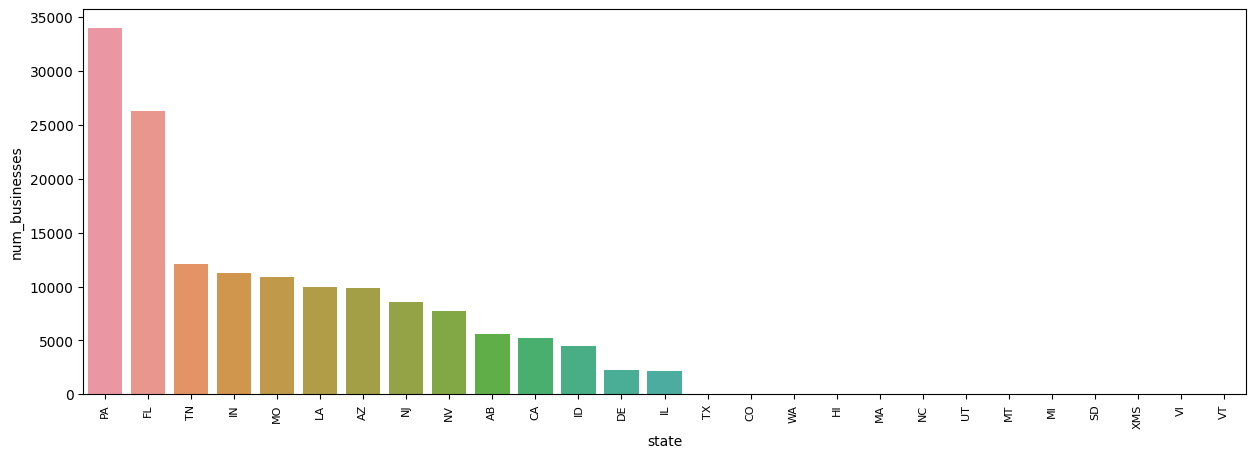

In [157]:
plt.figure(figsize=(15,5))

# Plot cities by number of businesses
state_counts = restaurants['state'].value_counts().reset_index()
state_counts.columns = ['state', 'num_businesses']

sns.barplot(data = state_counts,
            x='state',
            y='num_businesses')
# Rotate x-tick labels due to many states
plt.xticks(rotation=90, fontsize=8);

In [158]:
restaurants.state.nunique()

27

In [159]:
restaurants.state.isnull().sum()

0

In [160]:
restaurants.state.value_counts(normalize=True)[0:5]

PA    0.226404
FL    0.175129
TN    0.080188
IN    0.074807
MO    0.072586
Name: state, dtype: float64

### __Observations__
- 27 unique states represented
- High concentration:
  - Pennsylvania accounts for 23% of businesses
  - The top 5 states account for 63% of businesses
    - Pennsylvania (23%)
    - Florida (18%)
    - Tennessee (8%)
    - Indiana (7%)
    - Montana (7%)
- __No missing values__.